# __EDA (Explanatory Data Analysis) of Yellow taxies data NYC__

<img src = 'https://cabstartup.com/wp-content/uploads/2018/05/Yellow-Taxi-Banner.png' height = 500 width =1500>

# __Introduction__ 

- ### The dataset for this project is taken from NYC TLC Trip Record Data. [link]('https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page').
- ### In this project, New york city yellow taxi data of 7 months (Jan - Jul) in year 2021 are taken into consideration for the analysis.
- ### Here Dask, folium, geopandas, pandas library are utilized.

## __Objective:__

- ### The main goal of this project is to identify maximum taxi uasge day and distance between two points.
- ### Time difference between pick and drop location.
- ### Top pickup and dropping points in the city

## __Schema of the dataset__

- 'VendorID' = ID
- 'tpep_pickup_datetime' = pickup time and date
- 'tpep_dropoff_datetime' = drop time and date
- 'passenger_count' = passenger count
- 'trip_distance' = total distance
- 'RatecodeID' = Ratings 
- 'store_and_fwd_flag'
- 'PULocationID' = Pickup location id
- 'DOLocationID' = dropup location id
- 'payment_type' = mode of payment
- 'fare_amount' = trip amount 
- 'extra' = like waiting or extra time
- 'mta_tax' = tax 
- 'tip_amount' = final tip amount
- 'tolls_amount' = toll amount 
- 'improvement_surcharge' = surcharge amount
- 'total_amount' = final amount with all taxes, tip
- 'congestion_surcharge'

## __Analysis Part-I__

## __1. Importing libraries__

In [1]:
!pip install dask

In [2]:
# importing the libraries
import dask
import dask.dataframe as dd
import pandas as pd
import os
import glob

In [3]:
os.listdir("Trip_data")

['yellow_tripdata_2021-01.csv',
 'yellow_tripdata_2021-02.csv',
 'yellow_tripdata_2021-03.csv',
 'yellow_tripdata_2021-04.csv',
 'yellow_tripdata_2021-05.csv',
 'yellow_tripdata_2021-06.csv',
 'yellow_tripdata_2021-07.csv']

In [4]:
from glob import glob
files_ = sorted(glob(os.path.join("Trip_data", "*.csv")))

## __2. Creating the dask dataframe__

In [5]:
df = dd.read_csv(files_, dtype={'RatecodeID': 'float64',
       'VendorID': 'float64', 'tolls_amount': 'float64',
       'passenger_count': 'float64',
       'payment_type': 'float64'}, parse_dates = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
)

In [6]:
df.compute().info()

D:\Anaconda\envs\my_env\lib\site-packages\dask\dataframe\io\csv.py:125: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pandas_read_text(


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000700 entries, 0 to 290639
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
dtypes: datetime64[ns](2), 

## __3. Taking a sample of data for the further analysis__

In [7]:
#creating the sample with fraction 
new_data = df.sample(frac= 0.04).persist()

D:\Anaconda\envs\my_env\lib\site-packages\dask\dataframe\io\csv.py:125: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pandas_read_text(


In [8]:
new_data.compute().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600027 entries, 141052 to 279024
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               566659 non-null  float64       
 1   tpep_pickup_datetime   600027 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  600027 non-null  datetime64[ns]
 3   passenger_count        566659 non-null  float64       
 4   trip_distance          600027 non-null  float64       
 5   RatecodeID             566659 non-null  float64       
 6   store_and_fwd_flag     566659 non-null  object        
 7   PULocationID           600027 non-null  int64         
 8   DOLocationID           600027 non-null  int64         
 9   payment_type           566659 non-null  float64       
 10  fare_amount            600027 non-null  float64       
 11  extra                  600027 non-null  float64       
 12  mta_tax                600027 non-null 

In [9]:
new_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
141052,1.0,2021-01-05 13:41:01,2021-01-05 14:01:00,1.0,6.4,1.0,N,236,244,1.0,22.0,2.5,0.5,5.05,0.0,0.3,30.35,2.5
13035,1.0,2021-01-01 15:51:15,2021-01-01 15:56:45,1.0,1.0,1.0,N,230,68,1.0,6.0,2.5,0.5,0.00,0.0,0.3,9.30,2.5
63888,1.0,2021-01-03 13:11:33,2021-01-03 13:12:17,0.0,0.3,1.0,N,166,151,1.0,3.0,0.0,0.5,0.75,0.0,0.3,4.55,0.0
348098,1.0,2021-01-10 12:32:00,2021-01-10 12:38:04,1.0,1.2,1.0,N,237,236,1.0,6.5,2.5,0.5,1.95,0.0,0.3,11.75,2.5
271484,1.0,2021-01-08 12:21:29,2021-01-08 12:26:44,1.0,1.1,1.0,N,239,236,1.0,6.0,2.5,0.5,1.85,0.0,0.3,11.15,2.5


In [10]:
new_data.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
237757,NaN,2021-07-24 15:08:00,2021-07-24 15:34:00,NaN,2.96,NaN,NaN,239,246,NaN,13.39,0.00,0.5,2.00,0.0,0.3,18.69,2.5
132333,1.0,2021-07-31 18:09:06,2021-07-31 18:18:42,2.0,1.70,1.0,N,164,68,1.0,8.00,2.50,0.5,1.50,0.0,0.3,12.80,2.5
231001,NaN,2021-07-17 14:36:01,2021-07-17 15:09:11,NaN,12.54,NaN,NaN,232,127,NaN,40.67,5.50,0.5,0.00,0.0,0.3,46.97,0.0
107995,1.0,2021-07-31 14:40:17,2021-07-31 14:55:22,0.0,3.10,1.0,N,144,229,1.0,13.00,2.50,0.5,2.77,0.0,0.3,19.07,2.5
279024,NaN,2021-07-31 08:23:00,2021-07-31 08:35:00,NaN,3.44,NaN,NaN,10,130,NaN,28.08,2.75,0.5,0.00,0.0,0.3,31.63,0.0


In [11]:
new_data.compute()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
141052,1.0,2021-01-05 13:41:01,2021-01-05 14:01:00,1.0,6.40,1.0,N,236,244,1.0,22.00,2.50,0.5,5.05,0.0,0.3,30.35,2.5
13035,1.0,2021-01-01 15:51:15,2021-01-01 15:56:45,1.0,1.00,1.0,N,230,68,1.0,6.00,2.50,0.5,0.00,0.0,0.3,9.30,2.5
63888,1.0,2021-01-03 13:11:33,2021-01-03 13:12:17,0.0,0.30,1.0,N,166,151,1.0,3.00,0.00,0.5,0.75,0.0,0.3,4.55,0.0
348098,1.0,2021-01-10 12:32:00,2021-01-10 12:38:04,1.0,1.20,1.0,N,237,236,1.0,6.50,2.50,0.5,1.95,0.0,0.3,11.75,2.5
271484,1.0,2021-01-08 12:21:29,2021-01-08 12:26:44,1.0,1.10,1.0,N,239,236,1.0,6.00,2.50,0.5,1.85,0.0,0.3,11.15,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237757,NaN,2021-07-24 15:08:00,2021-07-24 15:34:00,NaN,2.96,NaN,NaN,239,246,NaN,13.39,0.00,0.5,2.00,0.0,0.3,18.69,2.5
132333,1.0,2021-07-31 18:09:06,2021-07-31 18:18:42,2.0,1.70,1.0,N,164,68,1.0,8.00,2.50,0.5,1.50,0.0,0.3,12.80,2.5
231001,NaN,2021-07-17 14:36:01,2021-07-17 15:09:11,NaN,12.54,NaN,NaN,232,127,NaN,40.67,5.50,0.5,0.00,0.0,0.3,46.97,0.0
107995,1.0,2021-07-31 14:40:17,2021-07-31 14:55:22,0.0,3.10,1.0,N,144,229,1.0,13.00,2.50,0.5,2.77,0.0,0.3,19.07,2.5


In [12]:
new_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

## __4. Calculating the duration of the trip__

### __4.1 Creating a new dataframe backend as pandas__

In [13]:
new_dt = new_data.compute().reset_index()

In [14]:
new_dt['tpep_pickup_datetime'][1]

Timestamp('2021-01-01 15:51:15')

In [15]:
import numpy as np

### __4.2 Creating a function to calculate the time difference__

- t0 = start time
- t1 = end time
- [link gives info about timedelta]('https://numpy.org/doc/stable/reference/arrays.datetime.html')
- here 'm' is minute and Unix epoch (00:00:00 UTC on '1' January 1970)
$$ (t1 - t0)

In [16]:
#time difference function
def time_(x):
    y = round((new_dt['tpep_dropoff_datetime'][x] - new_dt['tpep_pickup_datetime'][x])/np.timedelta64(1, 'm'), 2)
    return y
time_(0)

19.98

In [17]:
#appending difference time to list
t1 = []
for i in range(len(new_dt)):
    t = time_(i)
    t1.append(t)

## __5. Adding time diff to dataframe__

In [18]:
# adding a new column with time diff
new_dt['Time_diff_min'] = t1

In [19]:
new_dt

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Time_diff_min
0,141052,1.0,2021-01-05 13:41:01,2021-01-05 14:01:00,1.0,6.40,1.0,N,236,244,1.0,22.00,2.50,0.5,5.05,0.0,0.3,30.35,2.5,19.98
1,13035,1.0,2021-01-01 15:51:15,2021-01-01 15:56:45,1.0,1.00,1.0,N,230,68,1.0,6.00,2.50,0.5,0.00,0.0,0.3,9.30,2.5,5.50
2,63888,1.0,2021-01-03 13:11:33,2021-01-03 13:12:17,0.0,0.30,1.0,N,166,151,1.0,3.00,0.00,0.5,0.75,0.0,0.3,4.55,0.0,0.73
3,348098,1.0,2021-01-10 12:32:00,2021-01-10 12:38:04,1.0,1.20,1.0,N,237,236,1.0,6.50,2.50,0.5,1.95,0.0,0.3,11.75,2.5,6.07
4,271484,1.0,2021-01-08 12:21:29,2021-01-08 12:26:44,1.0,1.10,1.0,N,239,236,1.0,6.00,2.50,0.5,1.85,0.0,0.3,11.15,2.5,5.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600022,237757,NaN,2021-07-24 15:08:00,2021-07-24 15:34:00,NaN,2.96,NaN,NaN,239,246,NaN,13.39,0.00,0.5,2.00,0.0,0.3,18.69,2.5,26.00
600023,132333,1.0,2021-07-31 18:09:06,2021-07-31 18:18:42,2.0,1.70,1.0,N,164,68,1.0,8.00,2.50,0.5,1.50,0.0,0.3,12.80,2.5,9.60
600024,231001,NaN,2021-07-17 14:36:01,2021-07-17 15:09:11,NaN,12.54,NaN,NaN,232,127,NaN,40.67,5.50,0.5,0.00,0.0,0.3,46.97,0.0,33.17
600025,107995,1.0,2021-07-31 14:40:17,2021-07-31 14:55:22,0.0,3.10,1.0,N,144,229,1.0,13.00,2.50,0.5,2.77,0.0,0.3,19.07,2.5,15.08


## __Analysis Part-II__

## __6. Creating a new dataframe__

In [20]:
idata = new_dt.iloc[:,[0,1,2,3,4,5,8,9,17,19]]
idata.head()

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,Time_diff_min
0,141052,1.0,2021-01-05 13:41:01,2021-01-05 14:01:00,1.0,6.4,236,244,30.35,19.98
1,13035,1.0,2021-01-01 15:51:15,2021-01-01 15:56:45,1.0,1.0,230,68,9.30,5.50
2,63888,1.0,2021-01-03 13:11:33,2021-01-03 13:12:17,0.0,0.3,166,151,4.55,0.73
3,348098,1.0,2021-01-10 12:32:00,2021-01-10 12:38:04,1.0,1.2,237,236,11.75,6.07
4,271484,1.0,2021-01-08 12:21:29,2021-01-08 12:26:44,1.0,1.1,239,236,11.15,5.25


In [21]:
idata.isnull().sum()

index                        0
VendorID                 33368
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          33368
trip_distance                0
PULocationID                 0
DOLocationID                 0
total_amount                 0
Time_diff_min                0
dtype: int64

In [22]:
idata.shape

(600027, 10)

## __7. Identifying the outliners in the dataset__

### __7.1 Outliners in the time difference columns__

In [23]:
idata['Time_diff_min'].min()

-0.98

In [24]:
# smallest time difference
small= list(idata['Time_diff_min'].nsmallest(5))
small

[-0.98, -0.97, -0.97, -0.97, -0.95]

In [25]:
for i in small:
    z = idata[idata['Time_diff_min'] == i]
    print(z)


        index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
184225  54264       NaN  2021-03-19 12:03:59   2021-03-19 12:03:00   

        passenger_count  trip_distance  PULocationID  DOLocationID  \
184225              NaN           6.84           265            75   

        total_amount  Time_diff_min  
184225          23.0          -0.98  
         index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
48694   249564       NaN  2021-01-23 18:01:59   2021-01-23 18:01:01   
362867  240435       NaN  2021-05-10 11:05:58   2021-05-10 11:05:00   
485480  246879       NaN  2021-06-20 09:06:59   2021-06-20 09:06:01   

        passenger_count  trip_distance  PULocationID  DOLocationID  \
48694               NaN           2.10           265           141   
362867              NaN           2.12           265            39   
485480              NaN           3.57           265           203   

        total_amount  Time_diff_min  
48694          12.91          -0.97  


In [26]:
# larger time differences

large = list(idata['Time_diff_min'].nlargest(5))

In [27]:
for i in large:
    z1 = idata[idata['Time_diff_min'] == i]
    print(z1)

         index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
364138  266514       NaN  2021-05-12 13:05:12   2021-05-14 13:05:00   

        passenger_count  trip_distance  PULocationID  DOLocationID  \
364138              NaN           4.51           265           242   

        total_amount  Time_diff_min  
364138          6.81         2879.8  
         index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
371456  322332       NaN  2021-05-27 20:05:22   2021-05-28 21:05:00   

        passenger_count  trip_distance  PULocationID  DOLocationID  \
371456              NaN           16.1           265            61   

        total_amount  Time_diff_min  
371456         58.47        1499.63  
        index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
359216  62611       2.0  2021-05-25 07:10:52   2021-05-26 07:10:42   

        passenger_count  trip_distance  PULocationID  DOLocationID  \
359216              1.0          19.24           132           244   

## __7.2 Outliners in the trip distance__

In [28]:
idata['trip_distance'].min()

0.0

In [29]:
# long trip distance
large_trip = list(idata['trip_distance'].nlargest(5))

In [30]:
for i in large_trip:
    z2 = idata[idata['trip_distance'] == i]
    print(z2)

         index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
367983  249828       NaN  2021-05-13 21:10:00   2021-05-13 22:45:00   

        passenger_count  trip_distance  PULocationID  DOLocationID  \
367983              NaN      198144.98            51            49   

        total_amount  Time_diff_min  
367983          65.2           95.0  
         index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
365527  210362       NaN  2021-05-03 11:00:00   2021-05-03 11:25:00   

        passenger_count  trip_distance  PULocationID  DOLocationID  \
365527              NaN      187511.58           169           244   

        total_amount  Time_diff_min  
365527         21.31           25.0  
         index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
480539  182404       NaN  2021-06-10 04:35:00   2021-06-10 04:50:00   

        passenger_count  trip_distance  PULocationID  DOLocationID  \
480539              NaN      162966.16           225           106 

In [31]:
idata['trip_distance'].nunique()

3269

In [32]:
idata['trip_distance'].value_counts()

0.90     9248
1.00     9104
1.10     9062
0.80     8940
1.20     8901
         ... 
24.38       1
44.90       1
31.29       1
25.28       1
25.84       1
Name: trip_distance, Length: 3269, dtype: int64

## __8. Extracting day of the week from the timestamp__

In [33]:
# creating a new columns with pickup and dropping days

idata['pick_day'] = idata['tpep_pickup_datetime'].dt.day_name()
idata['dropping_day'] = idata['tpep_dropoff_datetime'].dt.day_name()
idata.head()

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_19948/2272664981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idata['pick_day'] = idata['tpep_pickup_datetime'].dt.day_name()
C:\Users\Nikhi\AppData\Local\Temp/ipykernel_19948/2272664981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idata['dropping_day'] = idata['tpep_dropoff_datetime'].dt.day_name()


,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,Time_diff_min,pick_day,dropping_day
0,141052,1.0,2021-01-05 13:41:01,2021-01-05 14:01:00,1.0,6.4,236,244,30.35,19.98,Tuesday,Tuesday
1,13035,1.0,2021-01-01 15:51:15,2021-01-01 15:56:45,1.0,1.0,230,68,9.30,5.50,Friday,Friday
2,63888,1.0,2021-01-03 13:11:33,2021-01-03 13:12:17,0.0,0.3,166,151,4.55,0.73,Sunday,Sunday
3,348098,1.0,2021-01-10 12:32:00,2021-01-10 12:38:04,1.0,1.2,237,236,11.75,6.07,Sunday,Sunday
4,271484,1.0,2021-01-08 12:21:29,2021-01-08 12:26:44,1.0,1.1,239,236,11.15,5.25,Friday,Friday


## __9. Calculating the latitudes and longtitudes__

In [34]:
#checking unique pickup location
idata['PULocationID'].nunique()

255

In [35]:
#checking the number of repetition of the pickup location
idata['PULocationID'].value_counts()

237    31200
236    29646
161    20035
186    19852
170    19226
       ...  
118        1
214        1
111        1
204        1
99         1
Name: PULocationID, Length: 255, dtype: int64

### __9.1 Installing and importing libraries for the calculation__

In [36]:
!pip install geopandas

In [37]:
!pip install geopy

In [38]:
import geopandas as gpd
import geopy

### __9.2 Using delay as magic method to save the processing the time__

In [39]:
from dask import delayed

In [52]:
!pip install ArcGIS

^C


In [40]:
# function for calculating latitudes and longtitudes
# here ArcGIS is used to extract the location details

@delayed(pure = True)
def addr_long(x):
    from geopy.geocoders import ArcGIS
    lat_ = []
    long_ = []
    points = []
    for i in x:
        loc = ArcGIS()
        addr = loc.geocode(i, timeout=None)
        if addr is None:
            lat_.append(None)
            long_.append(None)
        else:
            longitude = addr.longitude
            latitude = addr.latitude
            points.append((latitude, longitude))
    return points
addr_long(['NY 151']).compute()

[(40.719130000000064, -73.98560299999997)]

In [41]:
# converting into the list
pick_up_location = list(idata['PULocationID'].astype(str))

In [42]:
# concatenating the 'NY' (Newyork) and the string for easy identification of location
pick_up_point = []
for i in pick_up_location:
    x_ = 'NY' + ' ' + i
    pick_up_point.append(x_)

In [43]:
# creating a new column with concatenate values
idata['Pick_locationId'] = pick_up_point
pick_loc = list(idata['Pick_locationId'])

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_19948/2248969810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idata['Pick_locationId'] = pick_up_point


In [44]:
# converting into the list
drop_off_location = list(idata['DOLocationID'].astype(str))

In [45]:
# concatenating the 'NY' (Newyork) and the string for easy identification of location
drop_off_point = []
for i in drop_off_location:
    x_ = 'NY' + ' ' + i
    drop_off_point.append(x_)

In [46]:
# creating a new column with concatenate values
idata['dropoff_locationId'] = drop_off_point
drop_loc = list(idata['dropoff_locationId'])

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_19948/395845284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idata['dropoff_locationId'] = drop_off_point


In [47]:
%%time
# calculating the pickup location
plocation = [] 
for i in pick_loc[0:len(pick_loc)]:
    x = addr_long([i])
    plocation.append(x)

Wall time: 41.8 s


In [48]:
plocation[0].compute()

[(40.65374004452198, -73.74707492242896)]

### __9.3 Converting the delay objects into the values__

- [dask.compute]('http://distributed.dask.org/en/latest/manage-computation.html')

In [49]:
# dask.compute() is used to show the results and it saves a lot of time

pickup_loc = dask.compute(plocation)

In [50]:
%%time
# calculating the dropoff location
dlocation = [] 
for i in drop_loc[0:len(drop_loc)]:
    d_ = addr_long([i])
    dlocation.append(d_)

Wall time: 39.9 s


In [51]:
# dask.compute() is used to show the results and it saves a lot of time

dropoff_loc = dask.compute(dlocation)

In [52]:
idata.head()

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,Time_diff_min,pick_day,dropping_day,Pick_locationId,dropoff_locationId
0,141052,1.0,2021-01-05 13:41:01,2021-01-05 14:01:00,1.0,6.4,236,244,30.35,19.98,Tuesday,Tuesday,NY 236,NY 244
1,13035,1.0,2021-01-01 15:51:15,2021-01-01 15:56:45,1.0,1.0,230,68,9.30,5.50,Friday,Friday,NY 230,NY 68
2,63888,1.0,2021-01-03 13:11:33,2021-01-03 13:12:17,0.0,0.3,166,151,4.55,0.73,Sunday,Sunday,NY 166,NY 151
3,348098,1.0,2021-01-10 12:32:00,2021-01-10 12:38:04,1.0,1.2,237,236,11.75,6.07,Sunday,Sunday,NY 237,NY 236
4,271484,1.0,2021-01-08 12:21:29,2021-01-08 12:26:44,1.0,1.1,239,236,11.15,5.25,Friday,Friday,NY 239,NY 236


### __9.4 Creating a new columns with pickup and dropoff location__

In [53]:
#extracting the location and adding
idata['pi_location'] = pickup_loc[0]

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_19948/701638666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idata['pi_location'] = pickup_loc[0]


In [54]:
# creating list with all pickup locations
p_location = []
for i in range(len(idata['pi_location'])):
    x2 = idata['pi_location'][i][0]
    p_location.append(x2)

In [55]:
# reassigning to the initial column
idata['pi_location'] = p_location

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_19948/4037310880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idata['pi_location'] = p_location


In [56]:
#extracting the location and adding
idata['drop_location'] = dropoff_loc[0]

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_19948/4105642527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idata['drop_location'] = dropoff_loc[0]


In [57]:
# creating list with all dropoff locations
dr_location = []
for i in range(len(idata['drop_location'])):
    x3 = idata['drop_location'][i][0]
    dr_location.append(x3)

In [58]:
# reassigning to the initial column
idata['drop_location'] = dr_location

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_19948/777300601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idata['drop_location'] = dr_location


In [59]:
# creating a 4 new columns for starting and ending latitudes and longtitudes

idata[['slat', 'slong']] = pd.DataFrame(idata['pi_location'].tolist(), index=idata.index)
idata[['elat', 'elong']] = pd.DataFrame(idata['drop_location'].tolist(), index=idata.index)

D:\Anaconda\envs\my_env\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [60]:
# changing columns name for better accessing
idata.columns = ['index', 'VendorID', 'Pickup_datetime', 'Dropoff_datetime',
       'Passenger_count', 'Trip_distance', 'PULocationID', 'DOLocationID',
       'Total_amount', 'Time_diff_min', 'Pick_day', 'Dropping_day',
       'Pick_locationId', 'Dropoff_locationId', 'Pick_location', 'Drop_location',
       'Slat', 'Slong', 'Elat', 'Elong']
idata.head()

,index,VendorID,Pickup_datetime,Dropoff_datetime,Passenger_count,Trip_distance,PULocationID,DOLocationID,Total_amount,Time_diff_min,Pick_day,Dropping_day,Pick_locationId,Dropoff_locationId,Pick_location,Drop_location,Slat,Slong,Elat,Elong
0,141052,1.0,2021-01-05 13:41:01,2021-01-05 14:01:00,1.0,6.4,236,244,30.35,19.98,Tuesday,Tuesday,NY 236,NY 244,"(40.65374004452198, -73.74707492242896)","(40.7232747439702, -73.72368731719021)",40.653740,-73.747075,40.723275,-73.723687
1,13035,1.0,2021-01-01 15:51:15,2021-01-01 15:56:45,1.0,1.0,230,68,9.30,5.50,Friday,Friday,NY 230,NY 68,"(40.751705204835964, -73.7484793192308)","(42.86118333300004, -74.94543166699998)",40.751705,-73.748479,42.861183,-74.945432
2,63888,1.0,2021-01-03 13:11:33,2021-01-03 13:12:17,0.0,0.3,166,151,4.55,0.73,Sunday,Sunday,NY 166,NY 151,"(40.780672392143096, -73.79743099670318)","(40.719130000000064, -73.98560299999997)",40.780672,-73.797431,40.719130,-73.985603
3,348098,1.0,2021-01-10 12:32:00,2021-01-10 12:38:04,1.0,1.2,237,236,11.75,6.07,Sunday,Sunday,NY 237,NY 236,"(40.69285268505702, -73.72533553048825)","(40.65374004452198, -73.74707492242896)",40.692853,-73.725336,40.653740,-73.747075
4,271484,1.0,2021-01-08 12:21:29,2021-01-08 12:26:44,1.0,1.1,239,236,11.15,5.25,Friday,Friday,NY 239,NY 236,"(40.68933569229372, -73.72398491932245)","(40.65374004452198, -73.74707492242896)",40.689336,-73.723985,40.653740,-73.747075


## __10. Calculating the distance between two locations__

In [61]:
#calculating the distance between two locations using geodesic
from geopy.distance import geodesic
geodesic(idata['Pick_location'][0], idata['Drop_location'][0]).kilometers

7.970741442691283

In [62]:
#calculating the distance between two locations using great_circle
from geopy.distance import great_circle
great_circle(idata['Pick_location'][0], idata['Drop_location'][0]).kilometers

7.9794147171680025

In [63]:
# calculating the distance between two locations
distance = []
for i in range(len(idata)):
    dis_ = geodesic(idata['Pick_location'][i], idata['Drop_location'][i]).kilometers
    distance.append(dis_)

In [64]:
idata.shape

(600027, 20)

### __10.1 Insert distance as a newcolumn in the dataframe__

In [65]:
# inserting the column
idata.insert(20, 'Original_distance_Kms', distance)

In [66]:
idata.head()

,index,VendorID,Pickup_datetime,Dropoff_datetime,Passenger_count,Trip_distance,PULocationID,DOLocationID,Total_amount,Time_diff_min,...,Dropping_day,Pick_locationId,Dropoff_locationId,Pick_location,Drop_location,Slat,Slong,Elat,Elong,Original_distance_Kms
0,141052,1.0,2021-01-05 13:41:01,2021-01-05 14:01:00,1.0,6.4,236,244,30.35,19.98,...,Tuesday,NY 236,NY 244,"(40.65374004452198, -73.74707492242896)","(40.7232747439702, -73.72368731719021)",40.653740,-73.747075,40.723275,-73.723687,7.970741
1,13035,1.0,2021-01-01 15:51:15,2021-01-01 15:56:45,1.0,1.0,230,68,9.30,5.50,...,Friday,NY 230,NY 68,"(40.751705204835964, -73.7484793192308)","(42.86118333300004, -74.94543166699998)",40.751705,-73.748479,42.861183,-74.945432,254.530753
2,63888,1.0,2021-01-03 13:11:33,2021-01-03 13:12:17,0.0,0.3,166,151,4.55,0.73,...,Sunday,NY 166,NY 151,"(40.780672392143096, -73.79743099670318)","(40.719130000000064, -73.98560299999997)",40.780672,-73.797431,40.719130,-73.985603,17.298807
3,348098,1.0,2021-01-10 12:32:00,2021-01-10 12:38:04,1.0,1.2,237,236,11.75,6.07,...,Sunday,NY 237,NY 236,"(40.69285268505702, -73.72533553048825)","(40.65374004452198, -73.74707492242896)",40.692853,-73.725336,40.653740,-73.747075,4.716274
4,271484,1.0,2021-01-08 12:21:29,2021-01-08 12:26:44,1.0,1.1,239,236,11.15,5.25,...,Friday,NY 239,NY 236,"(40.68933569229372, -73.72398491932245)","(40.65374004452198, -73.74707492242896)",40.689336,-73.723985,40.653740,-73.747075,4.408646


In [67]:
# creating a new dataframe with fewer columns
i_data = idata.iloc[:, [1,4,8,9,10,11,12,13,14,15,16,17,18,19,20]]

### __10.2 Finding the mode of the week__

In [68]:
i_data['Pick_day'].mode()

0    Friday
dtype: object

In [69]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
i_data['Dropping_day'] = pd.Categorical(i_data['Dropping_day'], categories=cats, ordered=True)
i_data = i_data.sort_values('Dropping_day')

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_19948/3628933571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_data['Dropping_day'] = pd.Categorical(i_data['Dropping_day'], categories=cats, ordered=True)


## __11. Basic Visualization for data insights__

In [70]:
!pip install seaborn

In [72]:
import matplotlib_inline as plt
import seaborn as sns

### __11.1 Estimating the mean distance__

In [73]:
i_data.groupby('Pick_day')['Original_distance_Kms'].mean()

Pick_day
Friday       158.627199
Monday       163.596048
Saturday     167.345941
Sunday       183.092796
Thursday     154.256753
Tuesday      147.606941
Wednesday    144.546305
Name: Original_distance_Kms, dtype: float64

<AxesSubplot:xlabel='Pick_day'>

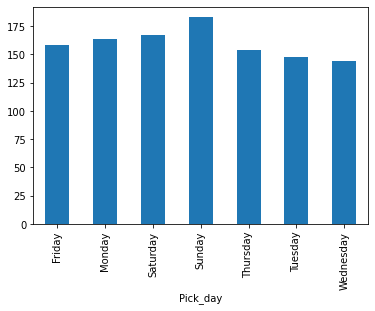

In [74]:
i_data.groupby('Pick_day')['Original_distance_Kms'].mean().plot(kind = 'bar')

In [76]:
dp = pd.DataFrame({'Monday': 163.596048, 'Tuesday': 147.606941, 'Wednesday': 144.546305, 
                   'Thursday': 154.256753, 'Friday' :158.627199,'Saturday': 167.345941, 'Sunday': 183.092796}, index= [0,1,2,3,4,5,6]).T
dp.reset_index(inplace = True)
dp.drop([1,2,3,4,5,6], axis= 1, inplace = True)

In [77]:
dp.columns =  ['Week_Day', 'Mean_Distance']

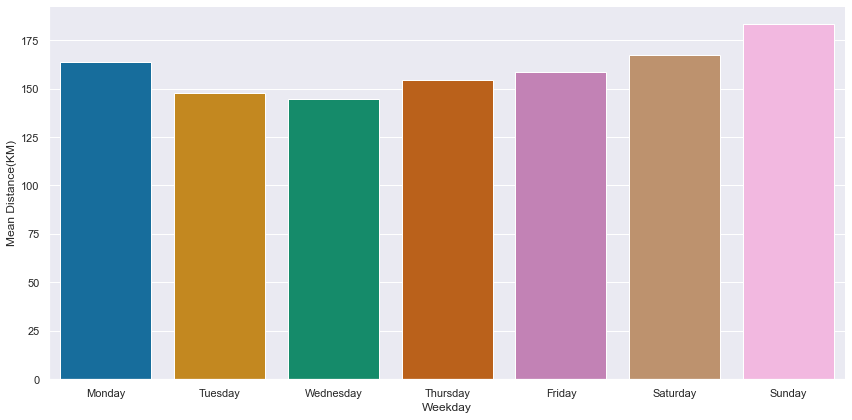

In [78]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.set(font_scale = 1)
g = sns.catplot(data= dp, x = "Week_Day", y="Mean_Distance", kind = 'bar', height = 6, aspect= 2, ci = None, palette= 'colorblind')
g.set_axis_labels("Weekday", "Mean Distance(KM)")


### __11.2 Analysis on the top and low pickup, drop location__

In [79]:
i_data.head()

,VendorID,Passenger_count,Total_amount,Time_diff_min,Pick_day,Dropping_day,Pick_locationId,Dropoff_locationId,Pick_location,Drop_location,Slat,Slong,Elat,Elong,Original_distance_Kms
470119,2.0,1.0,45.20,26.05,Monday,Monday,NY 138,NY 164,"(40.784640037820054, -73.8305899006457)","(40.750415354616045, -73.80297832398533)",40.784640,-73.830590,40.750415,-73.802978,4.458645
281287,1.0,1.0,5.80,0.07,Monday,Monday,NY 186,NY 186,"(40.74698543007731, -73.79163530001794)","(40.74698543007731, -73.79163530001794)",40.746985,-73.791635,40.746985,-73.791635,0.000000
526516,2.0,1.0,8.30,4.45,Monday,Monday,NY 263,NY 236,"(40.76272801766687, -73.72059648349116)","(40.65374004452198, -73.74707492242896)",40.762728,-73.720596,40.653740,-73.747075,12.308026
281292,2.0,1.0,16.56,11.40,Monday,Monday,NY 79,NY 231,"(42.596728333000044, -78.34029361099994)","(40.75540708589228, -73.7495581685021)",42.596728,-78.340294,40.755407,-73.749558,433.447448
281297,2.0,1.0,11.30,6.60,Monday,Monday,NY 264,NY 13,"(40.76103763904317, -73.71845818236235)","(41.30680000000007, -73.87324999999998)",40.761038,-73.718458,41.306800,-73.873250,61.991381


### __Pickup Locations__

In [80]:
i_data['Pick_locationId'].value_counts().nlargest(10)

NY 237    31200
NY 236    29646
NY 161    20035
NY 186    19852
NY 170    19226
NY 142    19056
NY 239    18947
NY 141    18621
NY 162    17840
NY 132    16735
Name: Pick_locationId, dtype: int64

### __11.2.1 Top pickup location__

Text(0.5, 1.0, 'Top Pickup Locations')

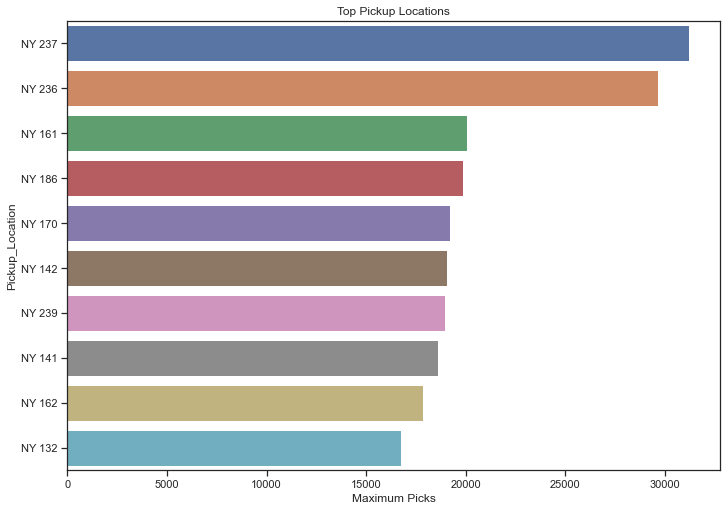

In [81]:
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.countplot(data=i_data, order=i_data.Pick_locationId.value_counts().nlargest(10).index, y='Pick_locationId')
ax.set(xlabel='Maximum Picks', ylabel='Pickup_Location')
ax.set_title('Top Pickup Locations')

### __11.2.2 Low pickup location__

Text(0.5, 1.0, 'Lowest Pickup Locations')

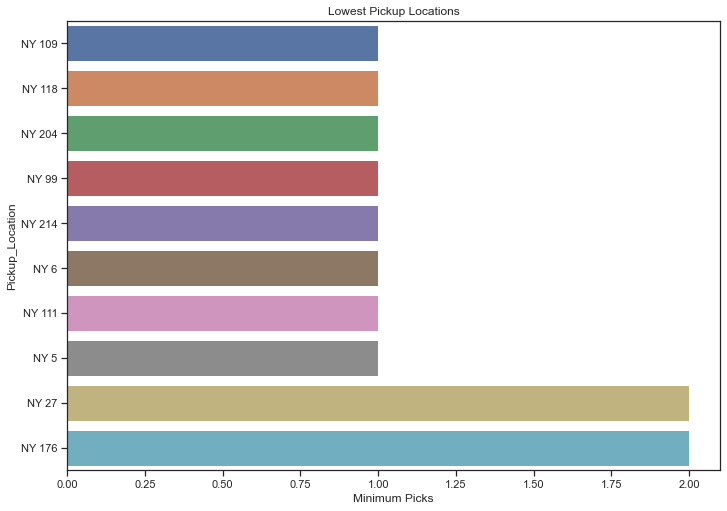

In [82]:
sns.set_theme(style="ticks")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.countplot(data=i_data, order=i_data.Pick_locationId.value_counts().nsmallest(10).index, y='Pick_locationId')
ax.set(xlabel='Minimum Picks', ylabel='Pickup_Location')
ax.set_title('Lowest Pickup Locations')

## __Dropoff Locations__

In [83]:
i_data['Dropoff_locationId'].value_counts().nlargest(10)

NY 236    29612
NY 237    27071
NY 141    18301
NY 239    18181
NY 161    18122
NY 170    17968
NY 142    16688
NY 238    15993
NY 162    14394
NY 140    14386
Name: Dropoff_locationId, dtype: int64

### __11.2.3 Top dropoff location__

Text(0.5, 1.0, 'Top Dropoff Locations')

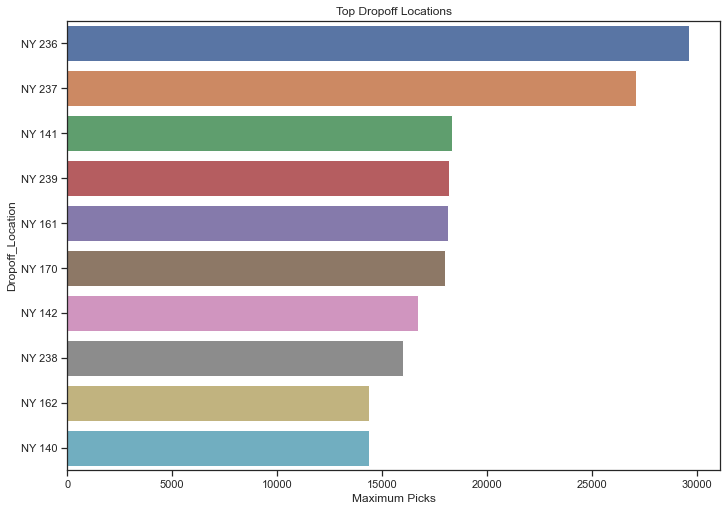

In [84]:
sns.set_theme(style="ticks")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.countplot(data=i_data, order=i_data.Dropoff_locationId.value_counts().nlargest(10).index, y='Dropoff_locationId')
ax.set(xlabel='Maximum Picks', ylabel='Dropoff_Location')
ax.set_title('Top Dropoff Locations')

### __11.2.4 Low dropoff location__

Text(0.5, 1.0, 'Low Dropoff Locations')

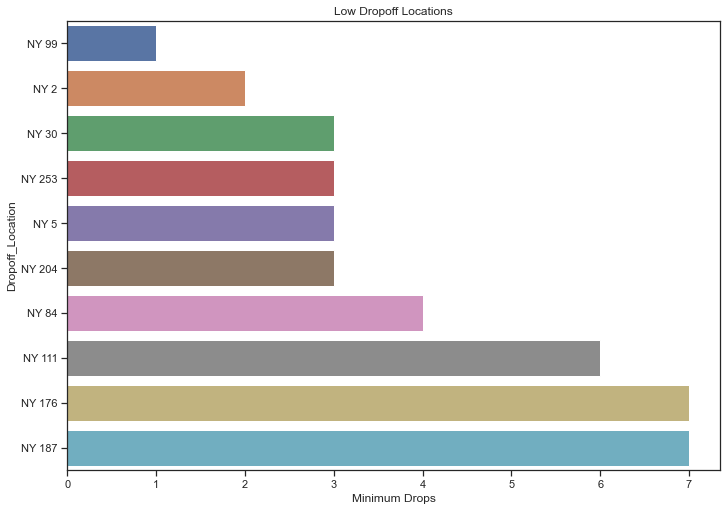

In [85]:
sns.set_theme(style="ticks")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.countplot(data=i_data, order=i_data.Dropoff_locationId.value_counts().nsmallest(10).index, y='Dropoff_locationId')
ax.set(xlabel='Minimum Drops', ylabel='Dropoff_Location')
ax.set_title('Low Dropoff Locations')

## __11.3 Dropping NaN values__

In [86]:
i_data.shape

(600027, 15)

In [87]:
i_data.isnull().sum()

VendorID                 33368
Passenger_count          33368
Total_amount                 0
Time_diff_min                0
Pick_day                     0
Dropping_day                 0
Pick_locationId              0
Dropoff_locationId           0
Pick_location                0
Drop_location                0
Slat                         0
Slong                        0
Elat                         0
Elong                        0
Original_distance_Kms        0
dtype: int64

In [88]:
i_data.dropna(inplace= True)

In [89]:
i_data.reset_index(drop = True, inplace = True)
i_data.head(5)

,VendorID,Passenger_count,Total_amount,Time_diff_min,Pick_day,Dropping_day,Pick_locationId,Dropoff_locationId,Pick_location,Drop_location,Slat,Slong,Elat,Elong,Original_distance_Kms
0,2.0,1.0,45.20,26.05,Monday,Monday,NY 138,NY 164,"(40.784640037820054, -73.8305899006457)","(40.750415354616045, -73.80297832398533)",40.784640,-73.830590,40.750415,-73.802978,4.458645
1,1.0,1.0,5.80,0.07,Monday,Monday,NY 186,NY 186,"(40.74698543007731, -73.79163530001794)","(40.74698543007731, -73.79163530001794)",40.746985,-73.791635,40.746985,-73.791635,0.000000
2,2.0,1.0,8.30,4.45,Monday,Monday,NY 263,NY 236,"(40.76272801766687, -73.72059648349116)","(40.65374004452198, -73.74707492242896)",40.762728,-73.720596,40.653740,-73.747075,12.308026
3,2.0,1.0,16.56,11.40,Monday,Monday,NY 79,NY 231,"(42.596728333000044, -78.34029361099994)","(40.75540708589228, -73.7495581685021)",42.596728,-78.340294,40.755407,-73.749558,433.447448
4,2.0,1.0,11.30,6.60,Monday,Monday,NY 264,NY 13,"(40.76103763904317, -73.71845818236235)","(41.30680000000007, -73.87324999999998)",40.761038,-73.718458,41.306800,-73.873250,61.991381


## __12. Passenger count by pickup location__

In [90]:
i_data.groupby('Pick_day')['Passenger_count'].value_counts()

Pick_day   Passenger_count
Friday     1.0                67893
           2.0                13265
           3.0                 3479
           5.0                 2167
           0.0                 2049
           6.0                 1497
           4.0                 1294
           7.0                    1
Monday     1.0                54295
           2.0                 9989
           3.0                 2644
           5.0                 1816
           0.0                 1761
           6.0                 1201
           4.0                  966
           7.0                    1
Saturday   1.0                57856
           2.0                14136
           3.0                 3881
           5.0                 2164
           0.0                 1724
           4.0                 1444
           6.0                 1334
Sunday     1.0                41978
           2.0                 9821
           3.0                 2620
           5.0                 1431
 

### __12.1 Visualization of the passenger count on the weekdays__

[Text(0.5, 0, 'Count'), Text(0, 0.5, 'Week_day')]

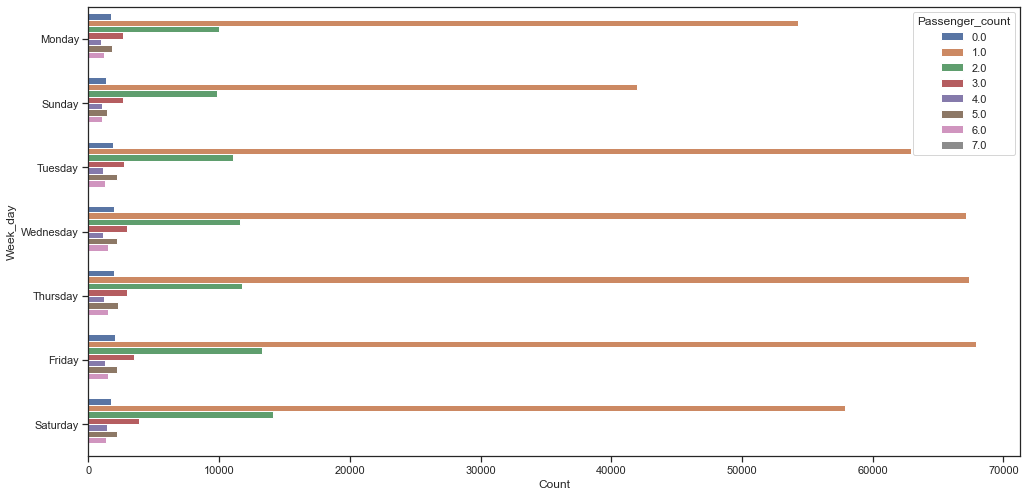

In [91]:
sns.set_theme(style="ticks")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16.7, 8.27)
ax = sns.countplot(y="Pick_day", hue="Passenger_count", data=i_data)
sns.color_palette('dark')
ax.set(xlabel='Count', ylabel='Week_day')

### __12.2 Analyzing with count 1__

In [92]:
i_data['slat_long'] = i_data[['Slong', 'Slat']].apply(tuple, axis=1)
i_data['elat_long'] = i_data[['Elong', 'Elat']].apply(tuple, axis=1)

In [93]:
!pip install pydeck

In [94]:
i_data[i_data['Passenger_count'] == 1.0].head(10)

,VendorID,Passenger_count,Total_amount,Time_diff_min,Pick_day,Dropping_day,Pick_locationId,Dropoff_locationId,Pick_location,Drop_location,Slat,Slong,Elat,Elong,Original_distance_Kms,slat_long,elat_long
0,2.0,1.0,45.20,26.05,Monday,Monday,NY 138,NY 164,"(40.784640037820054, -73.8305899006457)","(40.750415354616045, -73.80297832398533)",40.784640,-73.830590,40.750415,-73.802978,4.458645,"(-73.8305899006457, 40.784640037820054)","(-73.80297832398533, 40.750415354616045)"
1,1.0,1.0,5.80,0.07,Monday,Monday,NY 186,NY 186,"(40.74698543007731, -73.79163530001794)","(40.74698543007731, -73.79163530001794)",40.746985,-73.791635,40.746985,-73.791635,0.000000,"(-73.79163530001794, 40.74698543007731)","(-73.79163530001794, 40.74698543007731)"
2,2.0,1.0,8.30,4.45,Monday,Monday,NY 263,NY 236,"(40.76272801766687, -73.72059648349116)","(40.65374004452198, -73.74707492242896)",40.762728,-73.720596,40.653740,-73.747075,12.308026,"(-73.72059648349116, 40.76272801766687)","(-73.74707492242896, 40.65374004452198)"
3,2.0,1.0,16.56,11.40,Monday,Monday,NY 79,NY 231,"(42.596728333000044, -78.34029361099994)","(40.75540708589228, -73.7495581685021)",42.596728,-78.340294,40.755407,-73.749558,433.447448,"(-78.34029361099994, 42.596728333000044)","(-73.7495581685021, 40.75540708589228)"
4,2.0,1.0,11.30,6.60,Monday,Monday,NY 264,NY 13,"(40.76103763904317, -73.71845818236235)","(41.30680000000007, -73.87324999999998)",40.761038,-73.718458,41.306800,-73.873250,61.991381,"(-73.71845818236235, 40.76103763904317)","(-73.87324999999998, 41.30680000000007)"
6,2.0,1.0,11.00,4.48,Monday,Monday,NY 162,NY 141,"(40.760605703709125, -73.80395237371366)","(40.67078003458249, -73.7630699406206)",40.760606,-73.803952,40.670780,-73.763070,10.556201,"(-73.80395237371366, 40.760605703709125)","(-73.7630699406206, 40.67078003458249)"
8,1.0,1.0,17.85,9.37,Monday,Monday,NY 236,NY 166,"(40.65374004452198, -73.74707492242896)","(40.780672392143096, -73.79743099670318)",40.653740,-73.747075,40.780672,-73.797431,14.723795,"(-73.74707492242896, 40.65374004452198)","(-73.79743099670318, 40.780672392143096)"
10,2.0,1.0,14.16,8.18,Monday,Monday,NY 236,NY 239,"(40.65374004452198, -73.74707492242896)","(40.68933569229372, -73.72398491932245)",40.653740,-73.747075,40.689336,-73.723985,4.408646,"(-73.74707492242896, 40.65374004452198)","(-73.72398491932245, 40.68933569229372)"
11,2.0,1.0,29.76,15.97,Monday,Monday,NY 162,NY 231,"(40.760605703709125, -73.80395237371366)","(40.75540708589228, -73.7495581685021)",40.760606,-73.803952,40.755407,-73.749558,4.629301,"(-73.80395237371366, 40.760605703709125)","(-73.7495581685021, 40.75540708589228)"
12,2.0,1.0,10.80,7.12,Monday,Monday,NY 161,NY 107,"(40.754544522261114, -73.80572351878894)","(42.76375565097234, -73.67711894393948)",40.754545,-73.805724,42.763756,-73.677119,223.416360,"(-73.80572351878894, 40.754544522261114)","(-73.67711894393948, 42.76375565097234)"


### __12.3 Visualizing data with passenger count = 1__

In [95]:
import pydeck as pdk

GREEN_RGB = [0, 255, 0, 40]
RED_RGB = [240, 100, 0, 40]

arc_layer = pdk.Layer(
    "ArcLayer",
    data=i_data[i_data['Passenger_count'] == 1.0].head(10),
    get_width="S000 * 2",
    get_source_position=["Slong", "Slat"],
    get_target_position=["Elong", "Elat"],
    get_tilt=15,
    get_source_color=RED_RGB,
    get_target_color=GREEN_RGB,
    pickable=True,
    auto_highlight=True,
)

view_state = pdk.ViewState(latitude=40.7128, longitude=-74.0060, bearing=45, pitch=50, zoom=8,)
#TOOLTIP_TEXT = {"html": "Trips <br /> Pickup location in red; Dropoff location in green"}
r = pdk.Deck(arc_layer, initial_view_state=view_state, tooltip={"text": "{Pick_locationId} to {Dropoff_locationId} and distance is {Original_distance_Kms}"})
r.to_html("arc_layer.html")


### __12.4 Visualiazing the top pickup and dropping locations__

In [96]:
!pip install folium pandas

In [109]:
i_data['Pick_locationId'].value_counts().nlargest(5)

NY 237    30588
NY 236    28952
NY 186    19638
NY 161    19624
NY 142    18639
Name: Pick_locationId, dtype: int64

### __Pickup locations__

In [127]:
d = { 'Pick_locat' : [[40.69285268505702, -73.72533553048825],[40.65374004452198, -73.74707492242896],[40.74698543007731, -73.79163530001794], [40.754544522261114, -73.80572351878894], [40.67003757418262, -73.77273106839746]],
        'locationid' : ['NY 237', 'NY236', 'NY 186', 'NY 161', 'NY 142']}
df1 = pd.DataFrame(d)
df1

,Pick_locat,locationid
0,"[40.69285268505702, -73.72533553048825]",NY 237
1,"[40.65374004452198, -73.74707492242896]",NY236
2,"[40.74698543007731, -73.79163530001794]",NY 186
3,"[40.754544522261114, -73.80572351878894]",NY 161
4,"[40.67003757418262, -73.77273106839746]",NY 142


In [128]:
# pickup location
# #40.7128° N, 74.0060° W - Newyork location
import folium
center = [40.7128, -74.0060]
map_Newyork = folium.Map(location=center, zoom_start=8)

for i,r in df1.iterrows():
    folium.Marker(location=r['Pick_locat'],
                  popup = r['locationid'],
                  tooltip='PickUP Location').add_to(map_Newyork)
#display map
map_Newyork

### __Dropping locations__

In [124]:
i_data['Dropoff_locationId'].value_counts().nlargest(5)

NY 236    28889
NY 237    26483
NY 141    17815
NY 239    17719
NY 161    17668
Name: Dropoff_locationId, dtype: int64

In [135]:
d2 = { 'Dropoff_locat' : [[40.76272801766687, -73.72059648349116],[40.69285268505702, -73.72533553048825],[40.67078003458249, -73.7630699406206], [40.68933569229372, -73.72398491932245], [40.754544522261114, -73.80572351878894]],
        'locationid' : ['NY 236', 'NY 237', 'NY 141', 'NY 239', 'NY 161']}
df2 = pd.DataFrame(d2)
df2

,Dropoff_locat,locationid
0,"[40.76272801766687, -73.72059648349116]",NY 236
1,"[40.69285268505702, -73.72533553048825]",NY 237
2,"[40.67078003458249, -73.7630699406206]",NY 141
3,"[40.68933569229372, -73.72398491932245]",NY 239
4,"[40.754544522261114, -73.80572351878894]",NY 161


In [137]:
#dropping locations
import folium
center = [40.7128, -74.0060]
map_Newyork = folium.Map(location=center, zoom_start=8)

for i,r in df2.iterrows():
    folium.Marker(location=r['Dropoff_locat'],
                  popup = r['locationid'],
                  tooltip='Dropoff Location').add_to(map_Newyork)
#display map
map_Newyork

# __Conclusion__

### __In this dataset, the latitude, longitude, new travel distance, and time difference are calculated. Few oultiners are also identified in the data due to improper entry.__

### __From the calculations and analysis following are key findings:__

- ### Friday is the most active day and where most people utilized the taxis.- Raids with a single passenger are booked more compared to the 2,3,4 passengers
- ### NY 237 is the most common pickup point. Because it has an intersection with famous locations and schools.
- ### NY 236 is the most common dropoff point. 
- ### Where NY 140 has low pickup points and NY 99 has low dropping points compared to all others.
